In [75]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [76]:
from tensorflow.keras.applications import VGG16

base = VGG16(
    weights="D:/BE_Sem_7/Exam/DL/Practicals/LP-IV/datasets/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",
    include_top=False,
    input_shape=(64,64,3)
)


In [77]:

# ---- Freeze base model ----
for layer in base.layers:
    layer.trainable = False


In [78]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [79]:
train_data = train_gen.flow_from_directory(
    "D:/BE_Sem_7/Exam/DL/Practicals/LP-IV/datasets/Object Detection(Ass6)/caltech-101-img", target_size=(64,64),
    batch_size=32, subset='training'
)

val_data = train_gen.flow_from_directory(
    "D:/BE_Sem_7/Exam/DL/Practicals/LP-IV/datasets/Object Detection(Ass6)/caltech-101-img", target_size=(64,64),
    batch_size=32, subset='validation'
)


Found 7357 images belonging to 104 classes.
Found 1788 images belonging to 104 classes.


In [80]:

# ---- Add Classifier on top of base model ----
model = keras.Sequential([
    base,
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(train_data.num_classes, activation='softmax')
])

# ---- Compile (train only new layers) ----
model.compile(
    optimizer=Adam(),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [81]:

# ---- Train ----
model.fit(train_data, validation_data=val_data, epochs=5, batch_size=64)


Epoch 1/5


c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


230/230 ━━━━━━━━━━━━━━━━━━━━ 47s 200ms/step - accuracy: 0.2446 - loss: 3.5907 - val_accuracy: 0.5257 - val_loss: 2.0970
Epoch 2/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 49s 214ms/step - accuracy: 0.4985 - loss: 2.1545 - val_accuracy: 0.6029 - val_loss: 1.7139
Epoch 3/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 54s 236ms/step - accuracy: 0.5666 - loss: 1.7171 - val_accuracy: 0.6353 - val_loss: 1.5003
Epoch 4/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 115s 500ms/step - accuracy: 0.6388 - loss: 1.3959 - val_accuracy: 0.6510 - val_loss: 1.4099
Epoch 5/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 49s 214ms/step - accuracy: 0.6713 - loss: 1.2049 - val_accuracy: 0.6600 - val_loss: 1.3602


In [82]:
loss, accuracy = model.evaluate(val_data)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 189ms/step - accuracy: 0.6529 - loss: 1.3648
Validation Loss: 1.3602
Validation Accuracy: 0.6600


Detected 104 classes: ['BACKGROUND_Google', 'Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'Test', 'Train', 'accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors'

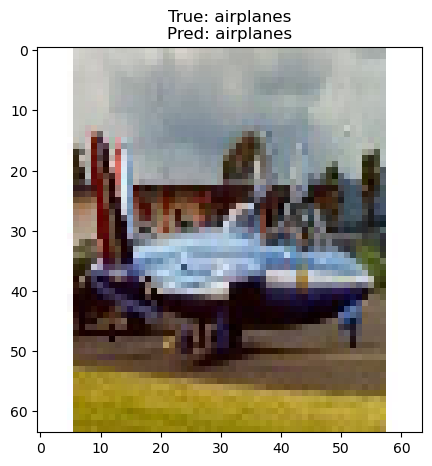


Batch Accuracy: 19/32 = 59.38%


In [83]:
import numpy as np

import matplotlib.pyplot as plt

# ---- Get class names from training data (maps index -> class folder name) ----
class_names = list(train_data.class_indices.keys())  # e.g., ['airplanes', 'ant', 'butterfly', ...]
print(f"Detected {len(class_names)} classes: {class_names}")  # Debug: show all class names

# Get a batch of validation images
images, labels = next(val_data)

# Make predictions
predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(labels, axis=1)

# ---- Display ONE prediction ----
plt.figure(figsize=(6, 5))
i = 1
plt.imshow(images[i])
true_label = class_names[true_classes[i]]
pred_label = class_names[predicted_classes[i]]
plt.title(f"True: {true_label}\nPred: {pred_label}")
plt.show()

# Print accuracy for this batch
correct = np.sum(predicted_classes == true_classes)
print(f"\nBatch Accuracy: {correct}/{len(images)} = {correct/len(images)*100:.2f}%")

In [84]:
# Finetuning
# ---- Unfreeze last 4 conv layers for fine-tuning ----
for layer in base.layers[-4:]:
    layer.trainable = True

In [85]:
# ---- Compile with smaller learning rate ----
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [86]:
# ---- Train (now fine-tunes last 4 layers too) ----
model.fit(train_data, validation_data=val_data, epochs=3)

Epoch 1/3
230/230 ━━━━━━━━━━━━━━━━━━━━ 70s 296ms/step - accuracy: 0.7329 - loss: 0.9575 - val_accuracy: 0.6868 - val_loss: 1.2519
Epoch 2/3
230/230 ━━━━━━━━━━━━━━━━━━━━ 75s 327ms/step - accuracy: 0.7679 - loss: 0.8326 - val_accuracy: 0.7058 - val_loss: 1.2050
Epoch 3/3
230/230 ━━━━━━━━━━━━━━━━━━━━ 78s 339ms/step - accuracy: 0.7928 - loss: 0.7333 - val_accuracy: 0.7008 - val_loss: 1.1957


In [87]:
loss, accuracy = model.evaluate(val_data)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 231ms/step - accuracy: 0.6908 - loss: 1.2453
Validation Loss: 1.1957
Validation Accuracy: 0.7008


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


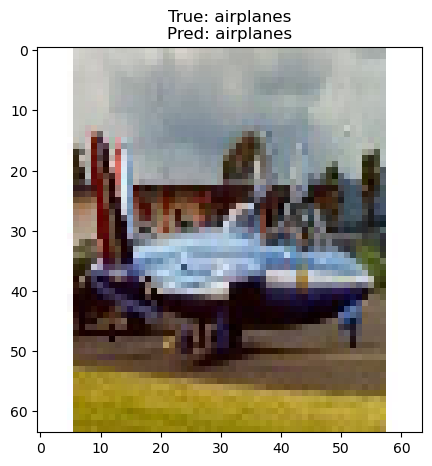


Batch Accuracy: 24/32 = 75.00%


In [88]:
# Make predictions
predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(labels, axis=1)

# ---- Display ONE prediction ----
plt.figure(figsize=(6, 5))
i = 1
plt.imshow(images[i])
true_label = class_names[true_classes[i]]
pred_label = class_names[predicted_classes[i]]
plt.title(f"True: {true_label}\nPred: {pred_label}")
plt.show()

# Print accuracy for this batch
correct = np.sum(predicted_classes == true_classes)
print(f"\nBatch Accuracy: {correct}/{len(images)} = {correct/len(images)*100:.2f}%")